# Capstone Project

Reuben Hough

In [1]:
# Importing Libraries
import pandas as pd
import pandas.util.testing as tm
from pandas import DataFrame
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os
%matplotlib inline
import sys
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from numpy import random
import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX as SX
from statsmodels.tsa.seasonal import seasonal_decompose as decomp
from statsmodels.tsa.stattools import adfuller
import itertools
register_matplotlib_converters()
from time import time
import math
from fbprophet import Prophet

<ipython-input-1-e1ef54be840b>:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Observation and Cleaning

In [2]:
# This function displays all columns when looking at the data
def display_all(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [3]:
# Assigning all csv files to a variable
data = ["AllstarFull.csv","Appearances.csv","AwardsManagers.csv",
        "AwardsPlayers.csv","AwardsShareManagers.csv","AwardsSharePlayers.csv",
        "Batting.csv","BattingPost.csv","CollegePlaying.csv",
        "Fielding.csv","FieldingOF.csv","FieldingOFsplit.csv",
        "FieldingPost.csv","HallOfFame.csv","HomeGames.csv","Managers.csv",
        "ManagersHalf.csv","Parks.csv","People.csv","Pitching.csv",
        "PitchingPost.csv","Salaries.csv","Schools.csv","SeriesPost.csv",
        "Teams.csv","TeamsFranchises.csv","TeamsHalf.csv"]

In [4]:
# Creating a dictionary for filenames
dictum = {}
files = {}
for x in data:
    dictum[x] = pd.read_csv(x)
for x in dictum:
    # Removing all ".csv" and making lowercase
    cleaned = os.path.basename(x).replace('.csv', '')
    # Re-reading files after name change
    df = pd.read_csv(x)
    # Adding to "files" dictionary
    files[cleaned] = df

In [5]:
display_all(files['People'])

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20085,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20086,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20087,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20088,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


This dataset consists of over twenty thousand Major League Baseball players from 1871 to 2019.

This dataset is from Kaggle, however they did not provide complete and accurate information, so I searched for the source of the information which I then copied into this repository.

In [6]:
P = files['People'].copy()
P.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20090 entries, 0 to 20089
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      20090 non-null  object 
 1   birthYear     19976 non-null  float64
 2   birthMonth    19808 non-null  float64
 3   birthDay      19666 non-null  float64
 4   birthCountry  20029 non-null  object 
 5   birthState    19535 non-null  object 
 6   birthCity     19918 non-null  object 
 7   deathYear     9844 non-null   float64
 8   deathMonth    9843 non-null   float64
 9   deathDay      9842 non-null   float64
 10  deathCountry  9840 non-null   object 
 11  deathState    9790 non-null   object 
 12  deathCity     9834 non-null   object 
 13  nameFirst     20053 non-null  object 
 14  nameLast      20090 non-null  object 
 15  nameGiven     20053 non-null  object 
 16  weight        19273 non-null  float64
 17  height        19353 non-null  float64
 18  bats          18910 non-nu

For my purpose many of these categories will not be very useful, for example when and where some of these people died. There is also many missing values in those categories.

In [7]:
P.drop(['deathYear','deathMonth','deathDay','deathCountry',
            'deathState','deathCity','retroID','bbrefID'], axis=1, inplace=True)

In [8]:
People = P.copy()
People = People.loc[ : ,['playerID','birthYear','birthMonth',
                         'debut','finalGame']]

The next thing to do is to get more information from the data. First I'm going to calculate how old each player was when they started playing, how long they played, and how old they were at retirement.

In [9]:
# There are relatively few N/A values, they can be dropped for now
People = People.dropna()

In [10]:
# Here I'm separating the years and months to make them easier to work with
People['debutYear'] = People['debut'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[:4]))
People['debutYear'] = People['debutYear'].apply(lambda x: int(x))
People['debutMonth'] = People['debut'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[-5:-3]))
People['debutMonth'] = People['debutMonth'].apply(lambda x: int(x))
People['finalYear'] = People['finalGame'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[:4]))
People['finalYear'] = People['finalYear'].apply(lambda x: int(x))
People['finalMonth'] = People['finalGame'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[-5:-3]))
People['finalMonth'] = People['finalMonth'].apply(lambda x: int(x))
People.drop(['debut','finalGame'], axis=1, inplace=True)

In [11]:
# This function turns the year and month columns into one value
def Months(df, ycol, mcol):
    z = []
    for x in df.index:
        z.append(12*(df['{}'.format(ycol)][x]) + (df['{}'.format(mcol)][x]))
    return z

In [12]:
start = Months(People, 'debutYear', 'debutMonth')
born = Months(People, 'birthYear', 'birthMonth')
final = Months(People, 'finalYear', 'finalMonth')

In [13]:
# This function subtracts the items of one list from another
def ToYears(list1, list2):
    z = []
    for x in list(range(len(list1))):
        z.append(round((list1[x] - list2[x])/12,2))
    return z

In [14]:
People['startingAge'] = ToYears(start,born)
People['timePlayed'] = ToYears(final,start)
People['endingAge'] = ToYears(final,born)

In [15]:
People = People.loc[ : ,['playerID','startingAge','timePlayed','endingAge']]

In [16]:
# Merging back to the original dataset, keeping N/A values for now
df = P.merge(People, how='left', on="playerID")

### Player Awards

In [17]:
AwardsPlayers = files['AwardsPlayers'].copy()
print(''.join((f"There have been {AwardsPlayers.shape[0]} awards ", 
f"given to {AwardsPlayers.nunique()[0]} players")))

There have been 6236 awards given to 1360 players


In [18]:
# That's less that 7 percent of the total,
# this should be useful in finding the best players
100*1360/20090

6.769537083125933

In [19]:
# This will let me make a simple plot and put in variables as needed
def toplot(dataframe, column, b, title="Title",xlabel="X Label Here",
            ylabel="Y Label Here", kind="line", color="skyblue"):
    mean = dataframe['{}'.format(column)].mean()
    median = dataframe['{}'.format(column)].median()
    ax = dataframe['{}'.format(column)].plot(kind=kind, bins=b, color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)

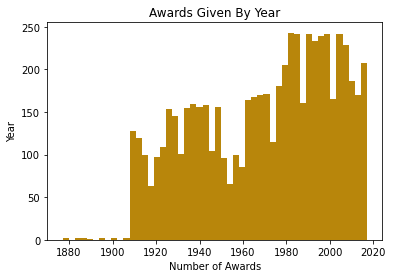

In [20]:
toplot(AwardsPlayers, 'yearID', 50, "Awards Given By Year",
        "Number of Awards", "Year", "hist", "darkgoldenrod")

Few awards were given out in the early years, presumably baseball was not as mainstream at the time. The MVP award began in 1910, the same time as the obvious increase.

There's also a clear dip in awards given shortly after WWII. I suspect this may be related to integration which was happening around that time, so this may be a sensitive issue to look into.

In [21]:
AwardsPlayers.sort_values(by='yearID')

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN
...,...,...,...,...,...,...
6183,arenano01,Silver Slugger,2017,NL,NaN,3B
6182,murphda08,Silver Slugger,2017,NL,NaN,2B
6181,goldspa01,Silver Slugger,2017,NL,NaN,1B
6179,cruzne02,Silver Slugger,2017,AL,NaN,DH


In [22]:
# Turning the players and awards into a dataframe
APNames = AwardsPlayers['playerID'].value_counts(dropna=False).index.tolist()
APAward = AwardsPlayers['playerID'].value_counts(dropna=False).tolist()

In [23]:
Awards = DataFrame([APNames,APAward]).transpose()
Awards.columns = ['playerID','awards']

Text(0, 0.5, 'Number of Awards')

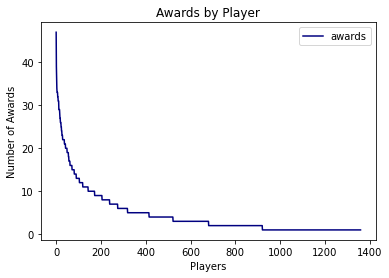

In [24]:
bx = Awards.plot(color="navy", title="Awards by Player")
bx.set_xlabel("Players")
bx.set_ylabel("Number of Awards")

In [25]:
# Merging awards with main dataframe
df = df.merge(Awards, how='left', on="playerID")

In [26]:
# Replacing NaN awards with zero
df.awards.replace(np.NaN, 0, inplace=True)

### Batting Scores

In [46]:
# Reading data
B = DataFrame(files['Batting'].copy())
B1 = DataFrame(files['Batting'].copy())
# To avoid dividing by zero I'm going to eliminate players with zero hits.
NoHits = B1[B1['H'] == 0].index
B1.drop(NoHits, inplace = True)
# Copying dataframe into smaller pieces to make it easier and faster to work with

B2 = DataFrame(files['Batting'].copy())
B1 = B1.loc[ : ,['playerID','AB', 'H']]
B2 = B2.loc[ : ,['playerID','H']]

Here I'm going to calculate the career batting average for each player.

In [29]:
rounded = round((B1.shape[0])/(B.shape[0]), 3)
print(rounded*100)

73.2


In [ ]:
B1 = B1.

In [45]:
for x in B1['playerID'].unique():
    PlayerA = B.loc[B['playerID'] == x]

addybo01
allisar01
allisdo01
ansonca01
armstbo01
barkeal01
barnero01
barrebi01
barrofr01
bassjo01
bealsto01
beaveed01
bechtge01
bellast01
berryto01
berthha01
birdge01
birdsda01
brainas01
brannmi01
burrohe01
careyto01
carleji01
conefr01
connone01
cravebi01
cuthbne01
deaneha01
donnepe01
duffyed01
eggleda01
fergubo01
fishech01
fislewe01
fleetfr01
flowedi01
flynncl01
foleyto01
foranji01
forceda01
fulmech01
glennjo01
goldswa01
gouldch01
hallge01
halliji01
hamra01
hastisc01
hatfijo01
heubege01
highadi01
hodesch01
jackssa01
johnsca01
kellybi01
kimbage01
kingma01
kingst01
kohlehe01
lennobi01
leonaan01
mackde01
malonfe01
mathebo01
mcatebu01
mcbridi01
mcderjo01
mcgeami01
mcmuljo01
mcveyca01
meyerle01
millsch01
millsev01
minched01
paborch01
patteda01
pearcdi01
pikeli01
pinkhed01
prattal01
prattto01
questjo01
quinnpa02
radcljo01
reachal01
sagerpo01
schafha01
selmafr01
senseco01
simmojo01
smithch01
spaldal01
startjo01
stirega01
suttoez01
sweasch01
treacfr01
waterfr01
whitede01
whiteel01
woltery01
w

matthbo01
mcgrajo01
mcquama01
mcswepa01
meekijo01
merribi01
morelha01
murphla01
neweljo01
obriejo02
oconnjo01
plockwa01
rettgge01
ricksjo01
rooksge01
schuljo01
shearjo01
spurned01
thornjo01
walshjo01
wentzja01
ziesbi01
abbeybe01
birdfr01
breitte01
campki01
cample01
cargobo01
clausfr01
cobbge01
connoji01
crossmo01
cuppyni01
dalysu01
deckege01
demilha01
draubja01
dungasa01
geninfr01
gilbebi01
godarjo01
haighed01
hawkebi01
hawlepi01
keelewi01
kennebr01
mahonda01
mcfaral01
mcmahja01
moranbi01
murphda01
newmach01
ohageha01
parroji01
pottsda01
shannfr01
stephdu01
tayloja01
ulricge01
willito01
woodcfr01
abbeych01
bannoji01
boydfr01
brownst01
clarkbo02
colcoto01
cooledu01
crossle01
darbyge01
daubda01
donnefr01
fishech04
frankch01
gilmaji01
goodebi01
graffjo01
hastich01
henryge01
irwinch01
jonesbu01
lachaca01
langebi01
lucidco01
lynchhe01
mauckha01
mccarja01
mccaupa01
mcfared01
mcgingu01
mcnabed01
menefjo01
motzfr01
murphco02
oconnfr01
oneilde01
parroto01
peitzhe01
quarlbi01
reitzhe01
rhodebi01

georgle01
geyerru01
giannjo01
greggve01
griffha01
gunnihy01
hallbe01
hallied01
hamilea01
handimi01
hartlgr01
hawked01
hendrcl01
hendrti01
henriol01
hoffch01
hoganwi01
hoggbr01
hovlijo01
humphal01
humphbe01
huntene01
ingersc01
jacksge01
jamesbi01
janvrha01
johnsot01
jonesbi02
joneste01
kaiseal01
kellybi02
killija01
krappge01
kreitra01
krichpa01
kutinjo01
lehrcl01
lejeula01
leonael01
lewisja01
lindsbi01
livelja01
lonerwa01
longto01
lowdelo01
mageele01
magnest01
marsaar01
martido01
maxwebe01
mcdoned02
mcgeeda01
mcivoot01
mctigbi01
millsja01
mitchcl01
mogrige01
morgara01
moserwa01
moultal01
nagleju01
nessja01
nunamle01
obriebu01
olsoniv01
oneilst01
paigepa01
paulege01
perduhu01
priesjo01
richtre01
riggejo01
rowanda01
russele01
saiervi01
schalbi01
scharbi01
severha01
sherrfr01
shultto01
slapncy01
smithre02
smithwa01
southcl01
spratha01
swindjo01
thomabl01
toneyfr01
tonneto01
toolebe01
tutwigu01
walketi01
welchha01
wiliede01
wilkied01
willibo01
willigu02
williri01
wilsosq01
wingoiv01
woodbge

johnsha01
kampik01
kanejo02
keeseji01
kibbiho01
koenima01
levsedu01
luceyjo01
mccrefr01
mcmulhu01
metzlal01
milleja02
mooreal01
munsojo01
myerbu01
neunjo01
niehaal01
odomhe01
onealsk01
pettyje01
piercra01
pooleji01
reinhar01
rogelbi01
rosensi01
rothrja01
shielbe01
siemeos01
smithre04
spencro01
stalega01
staufed01
stokeal01
tavenja01
thompfr03
tolsoch01
ulricdu01
vachete01
vargubi01
wannipe01
warneja01
warwibi01
welchhe01
welshji01
allenet01
attredi01
autrych02
baeched01
barbeda01
beckcl01
bolenst01
brickfr01
butlejo02
cartebl01
chriscu01
clabamo01
cohenan01
comorad01
cotteed01
coxle01
cronijo01
crowdal01
culloni02
cummija01
dunhale01
englech01
florepa01
gibsosa01
goldsha01
haywora01
hearnbu02
hermaba01
hollamu01
hudliwi01
hunnebi01
johnsau01
jonesdi01
kellyjo04
kiefejo01
koupalo01
lacygu01
lazzeto01
macfada01
melilsk01
moorebi02
morrebi01
neverer01
nichoch01
osborbo01
ottme01
patejo01
purdypi01
rambope01
reevebo01
reganbi01
rhyneha01
ricebo01
russeja01
scottpe01
sigaffr01
smithmi01
son

floreje01
garrifo01
gentisa01
gerheal01
goldslo01
haefnmi01
hallir01
hamrira01
hanskdo01
hartbi03
heltzhe01
hermage01
holmbi01
hoovejo01
johnsbi03
johnsdo02
karlan01
kellge01
kerrbu01
kleinlo01
krausja01
kreitmi01
lazorjo01
lowrysa01
lucielo01
mallobo01
maltzgo01
mcbrito01
mckeero01
meadch01
mertzji01
methebu01
metkoca01
metroch01
mungere01
niemabu01
obrieto03
olmolu01
oneilem01
ordento01
orreljo01
ostrojo01
overmst01
pafkoan01
paristo01
partero01
poatra01
polanhu01
pyleew01
rescixa01
reyesna01
reynoal01
roberre01
roccomi01
rullojo01
sauered01
schulho01
searske01
seerepa01
seminan01
signewa01
stallge02
stanked01
stephjo01
stirnsn01
stonero01
trinkke01
turched01
tyackji01
voisebi01
wenslbu01
wheatwo01
woodjo03
woodlge01
woodspi01
zarilal01
antoljo01
antonjo01
barnhvi01
barrefr01
basined01
bergaau01
berryjo03
bevenbi01
binksge01
birasst01
boromre01
breweja01
brownto02
byerlbu01
calvepa01
camelha01
cardobe01
carneed01
cartear01
cecilre01
chipmbo01
cieslte01
clarkgr01
crockcl01
cuccuco01
d

funkfr01
gablega02
gainejo01
gibbojo01
glennjo03
goldeji01
gondeje01
gonzato01
gotayju01
greenda02
greenfr01
hansero02
hawkiwy01
heistal01
hernaru01
jamesch01
javieju01
johnsbo02
johnsde01
johnske02
johnslo01
johnsst01
jonessh02
kaatji01
kralija01
krsnimi01
kutynma01
mahafar01
malonji01
marange01
maricju01
mathene01
mcauldi01
mckniji01
mcmanji01
minchdo01
murphda04
neigeal01
nelsome01
nichoda01
osteecl01
pagliji01
posadle01
rakowed01
reganph01
robinfl01
sadecra01
sadowed01
santoro01
schafjo01
shortbi01
smithch04
staffbi01
stigmdi01
sulliha02
thomaca01
torrejo01
umbriji01
walteke01
winebo01
woodsji01
allenbo04
alusige01
andercr01
archeji02
ardelda01
arrigge01
barracu01
bassno01
bautaed01
bolinbo01
bowmaer01
brinked01
brocklo01
brownpa01
bryanbi01
bucheje01
ciprifr01
ciscoga01
clemedo01
clenddo01
clonito01
colemch01
curtija01
donohji01
duffaji01
edwarjo01
farlebo01
fossla01
foxte01
francea01
freehbi01
fregoji01
grzenjo01
halleto01
hamilst01
hankija01
harknti01
hendlbo01
henryro01
hershmi

clarkja01
collida02
cruzhe01
cruzhe02
cubbami01
dadepa01
delarje01
dennyjo01
dillast01
dineeke01
easteja01
eastwra01
falcope01
flynndo01
fordda01
gardnar01
goodwda01
hamptik01
harlola01
heaveda01
hobsobu01
hopkido01
jacksro02
jamesar01
jonesbo02
kellyto01
koniedo01
lavelga01
lemasjo01
lemonch01
manniri01
manueje01
mcintjo01
mckayda01
merchan01
mileymi01
moateda01
molinbo01
morenom01
mumphje01
murrada01
nolanjo01
otted01
pocorbi01
poeppmi01
pruitro01
quirkja01
randowi01
rasmuer01
remyje01
reynocr01
riverbo01
scottro01
scrivch01
sellsda01
simpsjo01
smallro02
smithbi05
sosajo01
speedho01
squirmi01
staigro01
stantmi01
stillro02
strombr01
tekulke01
terlegr01
tomlida01
torrepa01
underto01
vailmi01
valenel01
wallide01
wallijo01
warthda01
webbha01
wernedo01
alcalsa01
alexaga01
andrefr01
andujjo01
armasto01
ashfotu01
asselbr01
aultdo01
bakerja01
bellke01
bernhju01
bosetri01
bowlist01
brownle02
burkegl01
champmi01
chantch01
claredo01
crosbke01
dauerri01
dawsoan01
dilonmi01
dressro01
dupremi01
ga

mantoje01
marakpa01
martiti02
mayde01
maynebr01
mcclepa01
mcintti01
mcraebr01
merceor01
mohorda01
moranmi01
munozpe01
naehrti01
neidlji01
novoara01
offerjo01
olivaom01
ortizja01
parkeri01
penage01
plantph01
quinlto01
reedda01
rhodeka01
rohdeda01
rosarvi01
rowlari01
ruskisc01
seguida01
shumpte01
simmsmi01
sojolu01
sprinst01
stephra01
stevele01
thomafr04
tomlira01
traxlbr01
valerju01
vatchji01
villahe01
wardtu01
whitema01
whitewa02
yorkmi01
amarari01
amaroru02
ashbyan01
bagweje01
banisje01
barbebr01
barnebr01
batiski01
beckro01
bellde01
bellju01
beltres01
benavfr01
blackbu02
bonesri01
bowenry01
brosisc01
brownja03
carrch02
castibr01
castifr01
castivi02
cedenan01
claytro01
colest01
coopega02
coopesc01
cormirh01
cronch01
donnech01
escobjo01
eusebto01
farismo01
florake01
gardnje01
giannra01
goodwto01
grosski01
hammoch01
haneych01
haresh01
harnipe01
harrido01
heredgi01
hernajo01
housiwa01
howarch01
howarda02
humphmi01
huntebr01
jeffcmi01
jeffere01
jonesch05
karroer01
kellypa03
kirbywa01
knob

nichtch01
nievewi01
nunezab02
olivomi01
olsenke01
pattejo02
pearcjo01
peavyja01
pelaeal01
pelloki01
penawi01
perezol01
phelpjo01
phillbr01
pineijo01
priorma01
ransoco01
redmama01
restomi01
riverju01
robergr01
romanja01
rossda01
ruanwi01
rushfji01
ryanmi03
saarlki01
sabatcc01
salazos01
sanchfr01
santajo01
santira01
santovi01
scutama01
searsto01
shueypa01
simonja01
smithja05
smithtr01
smythst01
sneades01
snellch02
snydeea01
starkde01
stullev01
swannpe01
tagucso01
tankede01
tejermi01
thamema01
thursjo01
torcato01
torrean02
uguetlu01
wathadu01
werthja01
wessoba01
wiggity01
zambrca01
zinteal01
abadan01
affelje01
atkinga01
austije01
baldero01
balejo01
barmecl01
bayja01
bowenro01
brohatr01
brunter01
bynummi01
cabremi01
calerki01
calloro01
clarkje02
clausbr01
condrcl01
correke01
crosbbu01
cruzen01
davisdo02
dejesda01
diazma02
dickera01
duncaje01
edwarmi02
ellisja01
escobke01
etherse01
foppeje01
fordle01
fordma01
frankry01
frankwa01
garcida03
georgch02
gerutjo01
glavimi01
gomesjo01
gonzaed01
go

flandyo01
francma02
garcigr01
gibsoky01
glennbr01
goebbja01
gonzama02
grichra01
guerral01
hahnje01
haleda02
hassaal01
heanean01
hendrky01
hernaen02
herredi01
hillta01
holtty01
huffda01
hutchdr01
inciaen01
jonesja06
josepca01
kiermke01
klubeco01
lambja01
lasteto01
liriary01
lopezra02
martica04
matzety01
mcallza01
mccanja02
moyast01
nelsoji02
nietoad01
nunovi01
odorro01
omallsh01
panikjo01
parkeky01
paulsbe01
pederjo01
peralda01
perezro02
peterja01
pireljo01
polangr01
polanjo01
pompeda01
rayro02
realmjt01
riverca02
roachdo01
roberda09
robincl01
rodrigu02
rodriyo01
rogerja02
rojasmi02
romakja01
romerst01
ruary01
sanchca01
santada01
santihe01
sardilu01
schlibr01
schlogu01
scrugxa01
singljo02
smolija01
solarya01
solerjo01
sotone01
souzast01
spangco01
springe01
spruize01
suareeu01
susacan01
szczuma01
tanakma01
taveros01
tayloch03
taylomi02
telisto01
tepesni01
treinbl01
vargake01
vazquch01
ventuyo01
verlaju01
villape01
wadats01
walkech02
watsoto01
wheelze01
whitlch01
wilkian01
willija01
wooda

In [44]:
B1['playerID'].unique()

array(['addybo01', 'allisar01', 'allisdo01', ..., 'yastrmi01',
       'youngal01', 'zavalse01'], dtype=object)

In [39]:
sum(Hank['AB'])

36888    468
37464    602
38119    609
38740    615
39355    601
39993    629
40625    590
41262    603
41960    592
42720    631
43472    570
44226    570
44977    603
45751    600
46537    606
47252    547
48184    516
49103    495
49986    449
50875    392
51767    340
52681    465
53588    271
Name: AB, dtype: int64

In [31]:
Hank = B.loc[B['playerID'] == 'aaronha01']
Hank['AB']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
36888,aaronha01,1954,1,ML1,NL,122,468,58,131,27,...,69.0,2.0,2.0,28,39.0,NaN,3.0,6.0,4.0,13.0
37464,aaronha01,1955,1,ML1,NL,153,602,105,189,37,...,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0
38119,aaronha01,1956,1,ML1,NL,153,609,106,200,34,...,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0
38740,aaronha01,1957,1,ML1,NL,151,615,118,198,27,...,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0
39355,aaronha01,1958,1,ML1,NL,153,601,109,196,34,...,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0
39993,aaronha01,1959,1,ML1,NL,154,629,116,223,46,...,123.0,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0
40625,aaronha01,1960,1,ML1,NL,153,590,102,172,20,...,126.0,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0
41262,aaronha01,1961,1,ML1,NL,155,603,115,197,39,...,120.0,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0
41960,aaronha01,1962,1,ML1,NL,156,592,127,191,28,...,128.0,15.0,7.0,66,73.0,14.0,3.0,0.0,6.0,14.0
42720,aaronha01,1963,1,ML1,NL,161,631,121,201,29,...,130.0,31.0,5.0,78,94.0,18.0,0.0,0.0,5.0,11.0


In [32]:
type(Hank)

pandas.core.frame.DataFrame

In [33]:
dfgdfgsgfgsd

NameError: name 'dfgdfgsgfgsd' is not defined

In [ ]:
B1 = DataFrame(files['Batting'].copy())

In [ ]:
B2 = B1.copy()
B1 = B1.loc[ : ,['playerID','AB', 'H']]
B2 = B2.loc[ : ,['playerID','H']]

In [ ]:
TotalAB = DataFrame(B1['AB'].groupby(B1['playerID']))
TotalH = DataFrame(B2['H'].groupby(B2['playerID']))
print(len(TotalH))
print(len(TotalAB))

In [ ]:
TotalAB[0]

In [ ]:
# This function returns the batting average by dividing at bats by hits
def Bat(df, atbats, hits):
    a = []
    for x in df.index:
        b = df['{}'.format(atbats)][x]
        c = df['{}'.format(hits)][x]
        try:
            b / c
        except ZeroDivisionError:
            a.append(0)
    return a

In [ ]:
B['AVG'] = Bat(B, "AB", "H")

In [ ]:
B.head()